We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np

max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Min and max temperature')

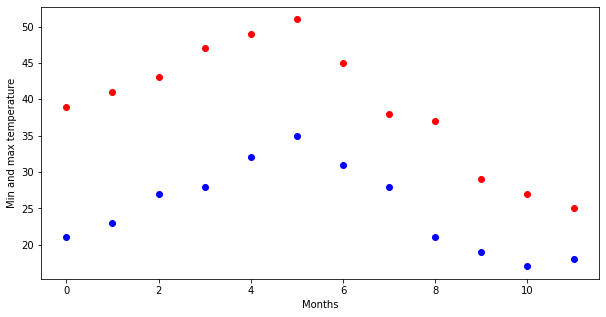

In [2]:
import matplotlib.pyplot as plt

months = np.arange(12)
plt.figure(figsize=(10,5))
plt.plot(months, max_temp, 'ro')
plt.plot(months, min_temp, 'bo')
plt.xlabel('Months')
plt.ylabel('Min and max temperature')

In [3]:
from scipy import optimize

def year_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(year_temps, months, max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(year_temps, months, min_temp, [-40, 20, 0])

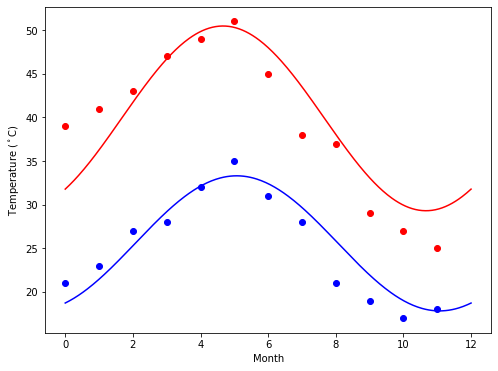

In [4]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(8,6))
plt.plot(months, max_temp, 'ro')
plt.plot(days, year_temps(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, year_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

matplotlib

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

In [7]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


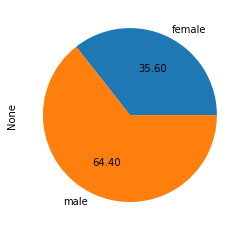

In [8]:
df.groupby('sex').size().plot(kind='pie', autopct='%.2f')

plt.show()

In [9]:
gender = df['sex'].astype('category')
gender = gender.cat.codes

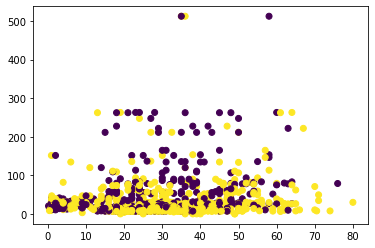

In [10]:
plt.scatter(df['age'],df['fare'],c=gender)